# Analyzing Depression Data

----

#### Summary
In this notebook I will be working on 'depression.csv'. This dataset shows the incidence (# out of 100,000 people) of depression by countries in 2016.I am interested in seeing whether countries with higher incidence of depression will have higher suicide rate, since depression is said to be a main factor that leads to suicide. 

#### Key Question
* Is there a relationship between depression rate and suicide rates? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

df = pd.read_csv('../data/Raw_data/depression.csv')
suicide = pd.read_csv('../data/Cleaned_data/suicide_total.csv')

#### Cleaning up data
* Dropped all columns except for value (which shows depression rate per 100,000) and year
* Reduced decimal places to 2 so that it's easier to read
* merged with cleaned suicide rate data

In [3]:
df
#removing columns with repetitive information
dep=df.filter(["location", "val","year"], axis=1)
dep

,location,val,year
0,Slovakia,499128.053004,2019
1,China,407089.773398,2019
2,India,542064.498452,2019
3,Vanuatu,548313.675600,2019
4,Qatar,489214.716800,2019
...,...,...,...
199,Belgium,516188.380709,2019
200,Italy,482216.850852,2019
201,Canada,522136.122869,2019
202,Costa Rica,511793.674040,2019


In [4]:
#because the data has too many decimal places that it's hard to read, reduced to 2
dep=dep.round(2)
dep

,location,val,year
0,Slovakia,499128.05,2019
1,China,407089.77,2019
2,India,542064.50,2019
3,Vanuatu,548313.68,2019
4,Qatar,489214.72,2019
...,...,...,...
199,Belgium,516188.38,2019
200,Italy,482216.85,2019
201,Canada,522136.12,2019
202,Costa Rica,511793.67,2019


In [5]:
merged = pd.merge(left=dep, right=suicide, left_on='location', right_on='Country')
merged

,location,val,year,Country,Sex,2016,2015,2010,2000,means
0,Slovakia,499128.05,2019,Slovakia,Both sexes,10.1,10.1,11.4,12.8,11.433333
1,China,407089.77,2019,China,Both sexes,8.0,8.1,10.0,14.1,10.700000
2,India,542064.50,2019,India,Both sexes,16.5,16.7,17.1,18.7,17.433333
3,Vanuatu,548313.68,2019,Vanuatu,Both sexes,5.4,5.5,6.2,8.7,6.766667
4,Qatar,489214.72,2019,Qatar,Both sexes,5.8,5.7,5.1,3.8,4.900000
...,...,...,...,...,...,...,...,...,...,...
175,Belgium,516188.38,2019,Belgium,Both sexes,15.7,15.2,16.8,18.8,17.100000
176,Italy,482216.85,2019,Italy,Both sexes,5.5,5.3,5.2,5.8,5.500000
177,Canada,522136.12,2019,Canada,Both sexes,10.4,10.5,11.1,11.6,11.033333
178,Costa Rica,511793.67,2019,Costa Rica,Both sexes,7.5,7.5,8.4,7.7,7.866667


#### Examine relationships
* Ran the merged data through a regression model: regressed suicide rate in 2016 on depression rate in 2016 (these 2 rates actually have the same unit (both are rate per 100,000 people) which makes for a better comparison)
* Result shows that there is a statistically significant positive relationship between depression rate and suicide rate: the more incidences of depression, the higher the suicide rate. This result matches my prediction. 

In [6]:
m1 = smf.ols(formula= 'Q("2016") ~ val', data=merged)
res = m1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Q("2016")   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.280
Date:                Wed, 23 Dec 2020   Prob (F-statistic):             0.0227
Time:                        20:10:34   Log-Likelihood:                -556.55
No. Observations:                 180   AIC:                             1117.
Df Residuals:                     178   BIC:                             1123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0278      4.168      0.007      0.9

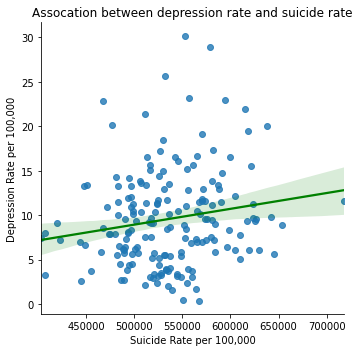

In [9]:
ax=sns.lmplot(x='val', y='2016', data=merged, line_kws={'color': 'green'})
ax.set(xlabel='Suicide Rate per 100,000', ylabel='Depression Rate per 100,000')
plt.title('Assocation between depression rate and suicide rate')
plt.tight_layout()
plt.savefig('depression.png',dpi=1200)